# Guia 01: Fundamentos de Deep Learning - El Perceptron

## Electiva II - Deep Learning | Tecnologico de Antioquia

---

**Programa:** Ingenieria en Software
**Asignatura:** Electiva II - Deep Learning
**Guia:** 01 de 14
**Autor:** Profesor Julian Florez

---

### Objetivo de Aprendizaje

Al finalizar esta guia, el estudiante estara en capacidad de:

- Comprender que es Deep Learning y su relacion con Machine Learning.
- Entender el funcionamiento del **Perceptron**, la unidad fundamental de las redes neuronales.
- Implementar un Perceptron desde cero utilizando NumPy.
- Experimentar con diferentes tasas de aprendizaje y funciones de activacion.
- Identificar las **limitaciones** del Perceptron simple (problema XOR).
- Comprender por que se necesitan redes multicapa.

### Concepto Nuevo Introducido

**El Perceptron:** La neurona artificial mas simple, propuesta por Frank Rosenblatt en 1958. Es el bloque fundamental sobre el cual se construyen todas las redes neuronales profundas modernas.

### Duracion Estimada

**3 horas** (incluye lectura teorica, experimentacion y preguntas de reflexion)

---

> **IMPORTANTE:** Las secciones marcadas con **\u270d\ufe0f** requieren tu respuesta escrita. Estas respuestas son parte de tu evaluacion. No las dejes en blanco.

---

## 1. Configuracion del Entorno

Antes de comenzar, necesitamos importar las librerias que usaremos a lo largo de toda la guia. Ejecuta la siguiente celda para asegurarte de que todo este correctamente instalado.

In [27]:
# ============================================================
# CONFIGURACION DEL ENTORNO
# ============================================================

# Libreria fundamental para operaciones numericas y manejo de arrays
import numpy as np

# Libreria para visualizacion de datos y graficos
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Modulos de scikit-learn para generacion de datos sinteticos y metricas
from sklearn.datasets import make_blobs, load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neural_network import MLPClassifier

# Configurar warnings para que no ensucien la salida
import warnings
warnings.filterwarnings('ignore')

# ============================================================
# SEMILLA DE REPRODUCIBILIDAD
# ============================================================
# Fijamos la semilla para que todos obtengamos los mismos resultados.
# Esto es fundamental en investigacion y en entornos educativos.
np.random.seed(42)

# ============================================================
# CONFIGURACION GLOBAL DE GRAFICOS
# ============================================================
# Hacemos que los graficos se vean mas grandes y legibles
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 0.3

print("Entorno configurado correctamente.")
print(f"NumPy version: {np.__version__}")
print("Todas las librerias fueron importadas sin errores.")

Entorno configurado correctamente.
NumPy version: 2.1.3
Todas las librerias fueron importadas sin errores.


---

## 2. Marco Teorico

### 2.1 Que es Deep Learning?

En el curso anterior de Machine Learning, aprendiste a construir modelos que aprenden patrones a partir de datos. Usaste algoritmos como regresion logistica, arboles de decision, SVM y k-NN. Estos algoritmos funcionan muy bien para muchos problemas, pero tienen una limitacion importante: **requieren que el humano seleccione y disene las caracteristicas (features)** que el modelo va a utilizar.

**Deep Learning** (Aprendizaje Profundo) es una rama del Machine Learning que utiliza **redes neuronales artificiales con multiples capas** para aprender automaticamente representaciones jerarquicas de los datos. En otras palabras:

- En **Machine Learning clasico**, tu decides que features usar (por ejemplo, el largo del petalo, el ancho del sepalo).
- En **Deep Learning**, la red neuronal **aprende sola** cuales son las mejores features, directamente a partir de los datos crudos.

#### Jerarquia de conceptos:

```
Inteligencia Artificial (IA)
    |__ Machine Learning (ML)
            |__ Deep Learning (DL)
                    |__ Redes Neuronales Convolucionales (CNN)
                    |__ Redes Neuronales Recurrentes (RNN)
                    |__ Transformers
                    |__ ... y muchas mas arquitecturas
```

Deep Learning ha revolucionado campos como:
- **Vision por computador:** reconocimiento facial, diagnostico medico por imagenes, conduccion autonoma.
- **Procesamiento de lenguaje natural:** traductores automaticos, chatbots, modelos de lenguaje (como GPT o Claude).
- **Audio:** reconocimiento de voz, generacion de musica, asistentes virtuales.
- **Juegos:** AlphaGo derrotando campeones mundiales de Go.

Pero todo comienza con una idea muy simple: **la neurona artificial**, tambien llamada **Perceptron**.

### 2.2 La Neurona Biologica vs la Neurona Artificial

Las redes neuronales artificiales estan **inspiradas** (no son copias exactas) en el funcionamiento del cerebro humano. Veamos la analogia:

#### La neurona biologica:

Tu cerebro contiene aproximadamente **86 mil millones** de neuronas, cada una conectada con miles de otras neuronas. Una neurona biologica funciona asi:

1. **Dendritas:** Reciben senales electricas de otras neuronas.
2. **Soma (cuerpo celular):** Procesa y acumula las senales recibidas.
3. **Axon:** Si la acumulacion de senales supera un **umbral**, la neurona se "dispara" y envia una senal a traves del axon.
4. **Sinapsis:** La conexion entre el axon de una neurona y la dendrita de otra. Cada sinapsis tiene una "fuerza" diferente.

#### La neurona artificial (Perceptron):

| Componente Biologico | Componente Artificial | Descripcion |
|---|---|---|
| Dendritas | Entradas ($x_1, x_2, ..., x_n$) | Los datos que recibe la neurona |
| Fuerza sinaptica | Pesos ($w_1, w_2, ..., w_n$) | La importancia de cada entrada |
| Soma | Suma ponderada ($\sum w_i x_i + b$) | Acumula las entradas multiplicadas por sus pesos |
| Umbral de disparo | Funcion de activacion ($f$) | Decide si la neurona se "activa" o no |
| Axon | Salida ($\hat{y}$) | El resultado de la neurona |

La diferencia clave es que una neurona biologica es enormemente compleja, mientras que la neurona artificial es una simplificacion matematica que captura la esencia del proceso: **recibir entradas, ponderarlas, sumarlas y decidir si activarse o no**.

### 2.3 El Perceptron de Rosenblatt

El **Perceptron** fue propuesto por **Frank Rosenblatt** en 1958 en el Cornell Aeronautical Laboratory. Es el modelo mas simple de neurona artificial y fue disenado originalmente para **clasificacion binaria** (separar datos en dos clases).

#### Como funciona el Perceptron?

El Perceptron realiza los siguientes pasos:

**Paso 1: Recibir las entradas**

El Perceptron recibe un vector de entradas $\mathbf{x} = [x_1, x_2, ..., x_n]$ donde cada $x_i$ es una caracteristica del dato.

**Paso 2: Calcular la suma ponderada**

Cada entrada se multiplica por un peso correspondiente y se suma un termino de sesgo (bias):

$$z = \sum_{i=1}^{n} w_i \cdot x_i + b = w_1 x_1 + w_2 x_2 + ... + w_n x_n + b$$

En notacion vectorial:

$$z = \mathbf{w}^T \mathbf{x} + b$$

Donde:
- $\mathbf{w} = [w_1, w_2, ..., w_n]$ es el vector de pesos
- $\mathbf{x} = [x_1, x_2, ..., x_n]$ es el vector de entradas
- $b$ es el bias (sesgo)

**Paso 3: Aplicar la funcion de activacion**

La suma ponderada $z$ se pasa a traves de una funcion de activacion $f(z)$ para obtener la salida:

$$\hat{y} = f(z)$$

En el Perceptron original, la funcion de activacion es la **funcion escalon** (step function):

$$f(z) = \begin{cases} 1 & \text{si } z \geq 0 \\ 0 & \text{si } z < 0 \end{cases}$$

**Paso 4: Comparar con la etiqueta real y actualizar pesos**

Si la prediccion $\hat{y}$ no coincide con la etiqueta real $y$, los pesos se actualizan usando la **regla de aprendizaje del Perceptron**:

$$w_i \leftarrow w_i + \eta \cdot (y - \hat{y}) \cdot x_i$$

$$b \leftarrow b + \eta \cdot (y - \hat{y})$$

Donde $\eta$ (eta) es la **tasa de aprendizaje** (learning rate), un hiperparametro que controla que tan grandes son los ajustes en cada paso.

### 2.4 Funciones de Activacion

Las funciones de activacion son un componente fundamental de las redes neuronales. Introducen **no linealidad** en el modelo, lo que le permite aprender patrones complejos. Sin ellas, una red neuronal de cualquier profundidad seria equivalente a una sola transformacion lineal.

Veamos las mas importantes:

#### 1. Funcion Escalon (Step Function)

Es la funcion original del Perceptron. Es binaria: la salida es 0 o 1.

$$f(z) = \begin{cases} 1 & \text{si } z \geq 0 \\ 0 & \text{si } z < 0 \end{cases}$$

- **Ventaja:** Simple e intuitiva.
- **Desventaja:** No es diferenciable en $z = 0$. No proporciona gradiente util para el aprendizaje basado en gradiente (backpropagation).

#### 2. Funcion Sigmoide (Logistica)

Transforma cualquier valor real a un numero entre 0 y 1. Es suave y diferenciable.

$$\sigma(z) = \frac{1}{1 + e^{-z}}$$

Su derivada es:

$$\sigma'(z) = \sigma(z) \cdot (1 - \sigma(z))$$

- **Ventaja:** Diferenciable, salida interpretable como probabilidad.
- **Desventaja:** Problema de **gradiente desvaneciente** (vanishing gradient) en valores muy positivos o muy negativos.

#### 3. Funcion Tangente Hiperbolica (tanh)

Similar a la sigmoide pero con rango entre -1 y 1.

$$\tanh(z) = \frac{e^z - e^{-z}}{e^z + e^{-z}}$$

- **Ventaja:** Centrada en cero, lo que puede acelerar el entrenamiento.
- **Desventaja:** Tambien sufre de gradiente desvaneciente.

#### 4. Funcion ReLU (Rectified Linear Unit)

La funcion de activacion mas popular en Deep Learning moderno.

$$\text{ReLU}(z) = \max(0, z) = \begin{cases} z & \text{si } z > 0 \\ 0 & \text{si } z \leq 0 \end{cases}$$

- **Ventaja:** Computacionalmente eficiente, no sufre de gradiente desvaneciente (para valores positivos), acelera la convergencia.
- **Desventaja:** Puede producir "neuronas muertas" (cuando la entrada siempre es negativa, la neurona deja de aprender).

### 2.5 El Proceso de Aprendizaje

Como "aprende" un Perceptron? El proceso es iterativo y se puede resumir en estos pasos:

1. **Inicializacion:** Los pesos $\mathbf{w}$ y el bias $b$ se inicializan con valores pequenos aleatorios (o en ceros).

2. **Forward pass (pasada hacia adelante):** Se calcula la prediccion para cada ejemplo de entrenamiento.

3. **Calculo del error:** Se compara la prediccion $\hat{y}$ con la etiqueta real $y$.

4. **Actualizacion de pesos:** Si hay error, se ajustan los pesos en la direccion que reduce el error.

5. **Repetir:** Se repiten los pasos 2-4 por multiples **epocas** (pasadas completas por todos los datos).

#### Conceptos clave:

- **Peso ($w_i$):** Representa la importancia o influencia de la entrada $x_i$. Un peso grande (positivo o negativo) significa que esa entrada tiene mucha influencia en la decision. Un peso cercano a cero significa que esa entrada es poco relevante.

- **Bias ($b$):** Es un termino de desplazamiento que permite mover la frontera de decision. Sin el bias, la frontera de decision siempre pasaria por el origen. Es analogo al intercepto en una regresion lineal.

- **Tasa de aprendizaje ($\eta$):** Controla el tamano de los pasos que damos al actualizar los pesos.
  - **Muy alta:** El modelo puede "saltar" por encima del optimo y no converger (oscilaciones).
  - **Muy baja:** El modelo converge muy lentamente, puede requerir muchas epocas.
  - **Adecuada:** El modelo converge de manera estable hacia una buena solucion.

- **Epoca:** Una pasada completa por todo el conjunto de datos de entrenamiento. Tipicamente, el modelo necesita varias epocas para aprender.

- **Convergencia:** Se dice que el modelo ha convergido cuando el error deja de disminuir significativamente o cuando clasifica correctamente todos los ejemplos de entrenamiento.

#### Teorema de convergencia del Perceptron:

Un resultado teorico importante es que **si los datos son linealmente separables, el Perceptron siempre convergera** a una solucion en un numero finito de pasos. Sin embargo, si los datos **no** son linealmente separables, el Perceptron nunca convergera; seguira oscilando indefinidamente.

---

## 3. Carga y Exploracion de Datos

Para nuestros experimentos, vamos a generar un dataset sintetico de clasificacion binaria. Usaremos `sklearn.datasets.make_blobs` para crear dos grupos (clusters) de puntos en 2D que sean **linealmente separables** (es decir, que se puedan separar con una linea recta).

Por que datos sinteticos? Porque nos permiten:
- Controlar exactamente como lucen los datos.
- Saber de antemano si el problema es resoluble.
- Enfocarnos en entender el algoritmo sin preocuparnos por el preprocesamiento.

In [8]:
# ============================================================
# GENERACION DEL DATASET SINTETICO
# ============================================================

# Generamos 200 puntos en 2D, divididos en 2 clases (clusters)
# - n_samples: numero total de muestras
# - centers: numero de clusters (clases)
# - n_features: numero de caracteristicas (2 para poder visualizar en 2D)
# - cluster_std: desviacion estandar de cada cluster (controla la dispersion)
# - random_state: semilla para reproducibilidad
X, y = make_blobs(
    n_samples=200,
    centers=2,
    n_features=2,
    cluster_std=1.5,
    random_state=42
)

# Veamos la forma de nuestros datos
print("Forma de X (datos):", X.shape)
print("Forma de y (etiquetas):", y.shape)
print("\nPrimeros 5 ejemplos:")
print("X:")
print(X[:5])
print("\ny (etiquetas):")
print(y[:5])
print(f"\nClases unicas: {np.unique(y)}")
print(f"Cantidad por clase: Clase 0 = {np.sum(y == 0)}, Clase 1 = {np.sum(y == 1)}")

Forma de X (datos): (200, 2)
Forma de y (etiquetas): (200,)

Primeros 5 ejemplos:
X:
[[ 2.24823735  1.07410715]
 [ 5.12395668  0.73232327]
 [ 4.6766441   2.72016712]
 [-4.10265319  9.72467477]
 [ 5.06136664  1.0391204 ]]

y (etiquetas):
[1 1 1 0 1]

Clases unicas: [0 1]
Cantidad por clase: Clase 0 = 100, Clase 1 = 100


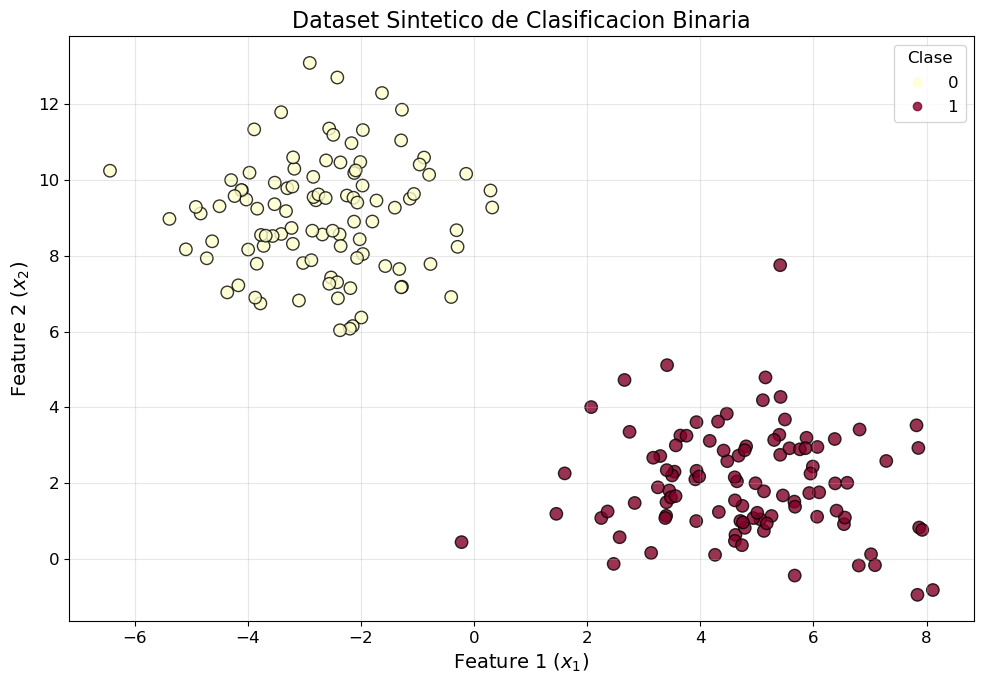


Observa que los dos grupos de puntos estan claramente separados.
Un Perceptron deberia poder encontrar una linea que los separe.


In [9]:
# ============================================================
# VISUALIZACION DEL DATASET
# ============================================================

fig, ax = plt.subplots(1, 1, figsize=(10, 7))

# Scatter plot coloreado por clase
# Clase 0 en azul, Clase 1 en rojo
scatter = ax.scatter(
    X[:, 0],          # Feature 1 (eje X)
    X[:, 1],          # Feature 2 (eje Y)
    c=y,              # Color segun la clase
    cmap='YlOrRd',       # Mapa de colores: azul-blanco-rojo
    edgecolors='k',   # Borde negro en cada punto
    s=80,             # Tamano de los puntos
    alpha=0.8         # Transparencia
)

ax.set_xlabel('Feature 1 ($x_1$)', fontsize=14)
ax.set_ylabel('Feature 2 ($x_2$)', fontsize=14)
ax.set_title('Dataset Sintetico de Clasificacion Binaria', fontsize=16)
ax.legend(*scatter.legend_elements(), title='Clase', fontsize=12, title_fontsize=12)

plt.tight_layout()
plt.show()

print("\nObserva que los dos grupos de puntos estan claramente separados.")
print("Un Perceptron deberia poder encontrar una linea que los separe.")

---

## 4. Experimentacion Guiada

Ahora viene la parte mas importante de esta guia. Vamos a realizar cinco experimentos para entender profundamente como funciona el Perceptron, cuales son sus fortalezas y cuales son sus limitaciones.

---

### EXPERIMENTO 1: Implementar un Perceptron desde Cero

Vamos a implementar un Perceptron completo utilizando **solo NumPy**. Esto es fundamental para entender que hay "debajo del capo" de las librerias como TensorFlow o PyTorch que usaremos mas adelante en el curso.

La clase `Perceptron` tendra dos metodos principales:
- `fit(X, y)`: Entrena el modelo ajustando los pesos.
- `predict(X)`: Realiza predicciones con los pesos aprendidos.

In [10]:
# ============================================================
# EXPERIMENTO 1: IMPLEMENTACION DEL PERCEPTRON DESDE CERO
# ============================================================

class Perceptron:
    """
    Implementacion de un Perceptron simple desde cero.

    Parametros:
    -----------
    learning_rate : float
        Tasa de aprendizaje (eta). Controla el tamano de los ajustes
        en cada actualizacion de pesos. Por defecto es 0.01.
    n_epochs : int
        Numero maximo de epocas (pasadas por los datos). Por defecto 100.

    Atributos despues de entrenar:
    ------------------------------
    weights_ : array de pesos aprendidos
    bias_ : float, bias aprendido
    errors_ : lista con el numero de errores por epoca
    """

    def __init__(self, learning_rate=0.01, n_epochs=100):
        # Guardamos los hiperparametros
        self.learning_rate = learning_rate
        self.n_epochs = n_epochs

    def activation(self, z):
        """
        Funcion de activacion escalon (step function).
        Retorna 1 si z >= 0, de lo contrario retorna 0.
        """
        return np.where(z >= 0, 1, 0)

    def fit(self, X, y):
        """
        Entrena el Perceptron con los datos X y las etiquetas y.

        Parametros:
        -----------
        X : array de forma (n_muestras, n_features)
            Datos de entrenamiento.
        y : array de forma (n_muestras,)
            Etiquetas de clase (0 o 1).

        Retorna:
        --------
        self : para permitir encadenamiento de metodos
        """
        n_muestras, n_features = X.shape

        # Paso 1: Inicializar pesos en ceros
        # Un peso por cada feature
        self.weights_ = np.zeros(n_features)

        # Inicializar bias en cero
        self.bias_ = 0.0

        # Lista para guardar el numero de errores en cada epoca
        self.errors_ = []

        # Paso 2: Iterar por cada epoca
        for epoca in range(self.n_epochs):
            errores_epoca = 0

            # Paso 3: Iterar por cada ejemplo de entrenamiento
            for xi, yi in zip(X, y):
                # Paso 3a: Calcular la suma ponderada (z = w^T * x + b)
                z = np.dot(xi, self.weights_) + self.bias_

                # Paso 3b: Aplicar funcion de activacion
                y_pred = self.activation(z)

                # Paso 3c: Calcular el error (diferencia entre real y predicho)
                error = yi - y_pred

                # Paso 3d: Actualizar pesos y bias si hay error
                # w_i = w_i + eta * (y - y_pred) * x_i
                self.weights_ += self.learning_rate * error * xi

                # b = b + eta * (y - y_pred)
                self.bias_ += self.learning_rate * error

                # Contar errores (si error != 0, hubo clasificacion incorrecta)
                errores_epoca += int(error != 0)

            # Guardar el numero de errores de esta epoca
            self.errors_.append(errores_epoca)

            # Si no hubo errores, el modelo ya convergio
            if errores_epoca == 0:
                print(f"Convergencia alcanzada en la epoca {epoca + 1}")
                break

        return self

    def predict(self, X):
        """
        Realiza predicciones para un conjunto de datos X.

        Parametros:
        -----------
        X : array de forma (n_muestras, n_features)

        Retorna:
        --------
        array de predicciones (0 o 1)
        """
        z = np.dot(X, self.weights_) + self.bias_
        return self.activation(z)


print("Clase Perceptron definida correctamente.")
print("Ahora vamos a entrenarla con nuestro dataset sintetico.")

Clase Perceptron definida correctamente.
Ahora vamos a entrenarla con nuestro dataset sintetico.


In [11]:
# ============================================================
# ENTRENAMIENTO DEL PERCEPTRON
# ============================================================

# Crear una instancia del Perceptron con tasa de aprendizaje 0.01 y 100 epocas
perceptron = Perceptron(learning_rate=0.01, n_epochs=100)

# Entrenar el modelo con nuestro dataset
perceptron.fit(X, y)

# Mostrar los pesos y bias aprendidos
print(f"\nPesos aprendidos: w1 = {perceptron.weights_[0]:.4f}, w2 = {perceptron.weights_[1]:.4f}")
print(f"Bias aprendido: b = {perceptron.bias_:.4f}")

# Calcular la precision (accuracy) del modelo
predicciones = perceptron.predict(X)
accuracy = accuracy_score(y, predicciones)
print(f"\nAccuracy en entrenamiento: {accuracy * 100:.2f}%")

# Mostrar la cantidad de errores por epoca
print(f"\nErrores por epoca: {perceptron.errors_}")
print(f"Total de epocas usadas: {len(perceptron.errors_)}")

Convergencia alcanzada en la epoca 3

Pesos aprendidos: w1 = 0.1113, w2 = -0.0116
Bias aprendido: b = 0.0300

Accuracy en entrenamiento: 100.00%

Errores por epoca: [4, 1, 0]
Total de epocas usadas: 3


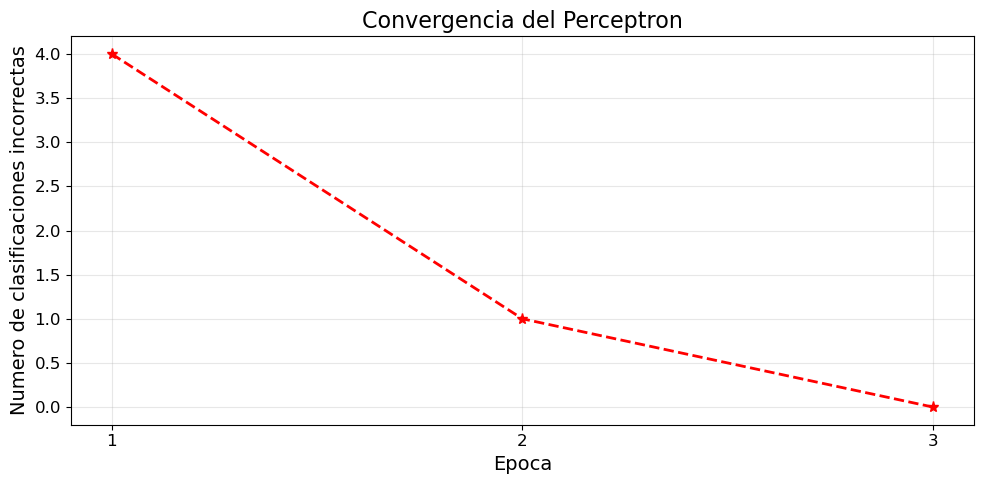

In [12]:
# ============================================================
# VISUALIZACION: ERRORES POR EPOCA
# ============================================================

fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(
    range(1, len(perceptron.errors_) + 1),  # Eje X: numero de epoca
    perceptron.errors_,                      # Eje Y: errores en esa epoca
    marker='*',                              # Marcador circular
    linestyle='--',                           # Linea continua
    color='r',                       # Color de la linea
    linewidth=2,
    markersize=8
)

ax.set_xlabel('Epoca', fontsize=14)
ax.set_ylabel('Numero de clasificaciones incorrectas', fontsize=14)
ax.set_title('Convergencia del Perceptron', fontsize=16)
ax.set_xticks(range(1, len(perceptron.errors_) + 1))

plt.tight_layout()
plt.show()

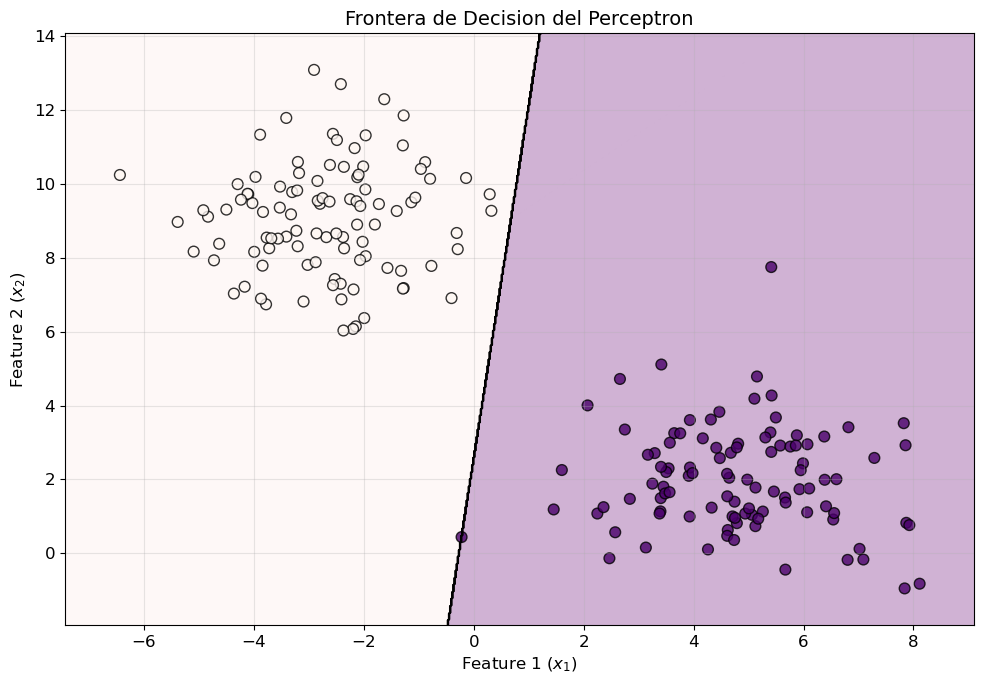

La linea negra es la frontera de decision.
Los puntos de un lado son clasificados como clase 0, los del otro como clase 1.

Observa que la frontera es una LINEA RECTA.
El Perceptron solo puede aprender fronteras lineales.


In [13]:
# ============================================================
# VISUALIZACION: FRONTERA DE DECISION
# ============================================================

def plot_decision_boundary(X, y, model, title="Frontera de Decision", ax=None):
    """
    Funcion auxiliar para visualizar la frontera de decision de un modelo.

    Parametros:
    -----------
    X : array (n_muestras, 2) - datos con 2 features
    y : array (n_muestras,) - etiquetas
    model : modelo con metodo predict()
    title : titulo del grafico
    ax : eje de matplotlib (opcional)
    """
    if ax is None:
        fig, ax = plt.subplots(figsize=(10, 7))

    # Crear una malla de puntos que cubra todo el espacio de features
    # con un pequeno margen extra
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    # Crear una cuadricula de puntos separados por 0.02
    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, 0.02),
        np.arange(y_min, y_max, 0.02)
    )

    # Predecir la clase para cada punto de la cuadricula
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Pintar las regiones de decision
    ax.contourf(xx, yy, Z, alpha=0.3, cmap='RdPu')
    ax.contour(xx, yy, Z, colors='k', linewidths=1)

    # Dibujar los puntos de datos
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap='RdPu', edgecolors='k', s=60, alpha=0.8)

    ax.set_xlabel('Feature 1 ($x_1$)', fontsize=12)
    ax.set_ylabel('Feature 2 ($x_2$)', fontsize=12)
    ax.set_title(title, fontsize=14)


# Visualizar la frontera de decision del Perceptron entrenado
fig, ax = plt.subplots(figsize=(10, 7))
plot_decision_boundary(X, y, perceptron,
                       title='Frontera de Decision del Perceptron', ax=ax)
plt.tight_layout()
plt.show()

print("La linea negra es la frontera de decision.")
print("Los puntos de un lado son clasificados como clase 0, los del otro como clase 1.")
print("\nObserva que la frontera es una LINEA RECTA.")
print("El Perceptron solo puede aprender fronteras lineales.")

### Pregunta del Experimento 1

**Cuantas epocas necesito el modelo para converger? Por que crees que fue ese numero?**

Pistas para tu reflexion:
- Observa la grafica de errores por epoca.
- Piensa en la separabilidad de los datos.
- Que pasaria si los clusters estuvieran mas juntos (mayor overlap)?

### Tu respuesta:

Los errores por epoca fueron [4, 1, 0]. En la época 3 no hubo errores, así que el modelo paró, como los dos clusters no se mezclan entre sí, al Perceptrón le resulta muy fácil encontrar una línea recta que los divida

---

### EXPERIMENTO 2: Efecto de la Tasa de Aprendizaje

La **tasa de aprendizaje** ($\eta$) es uno de los hiperparametros mas importantes en cualquier modelo de aprendizaje automatico. Es el factor que controla **que tan grandes son los pasos** que da el modelo al actualizar sus pesos.

Imaginalo asi:
- Estas bajando una montana con los ojos vendados.
- La tasa de aprendizaje es **el tamano de cada paso** que das.
- Si das pasos muy grandes, puedes pasar de largo el valle (el minimo) y terminar en otra montana.
- Si das pasos muy pequenos, vas a tardar una eternidad en llegar al fondo.
- Necesitas un tamano de paso que sea "justo" para llegar al fondo de manera eficiente.

Vamos a entrenar el Perceptron con 4 tasas de aprendizaje diferentes y comparar los resultados.

Convergencia alcanzada en la epoca 3
Convergencia alcanzada en la epoca 3
Convergencia alcanzada en la epoca 3
Convergencia alcanzada en la epoca 3


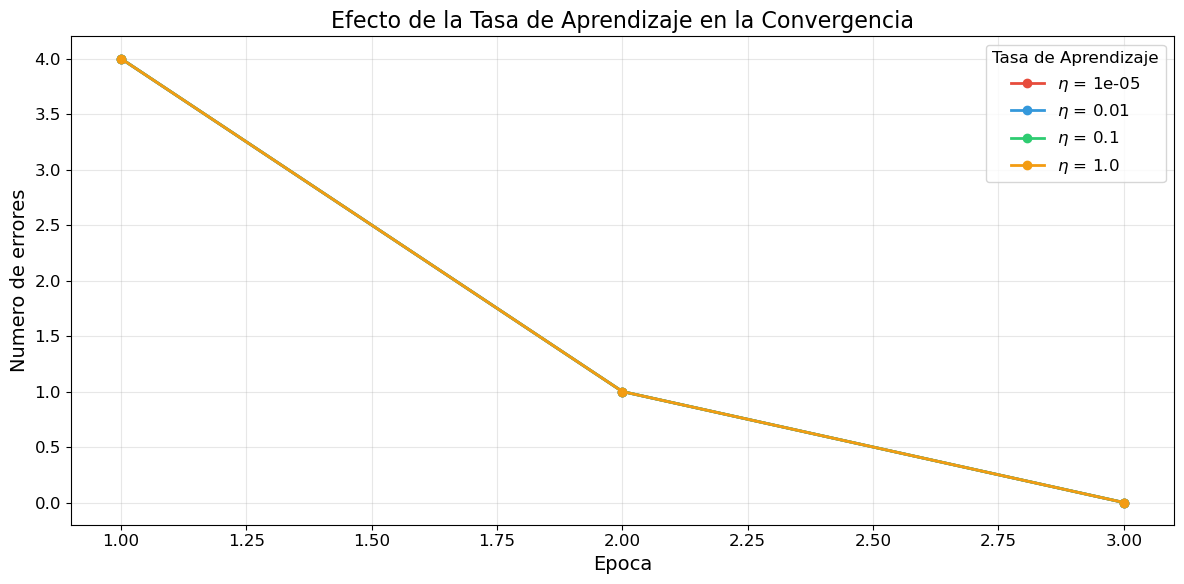


Resumen de convergencia:
--------------------------------------------------
eta = 1e-05 | Epocas:   3 | Error final:   0 | Accuracy: 100.0%
eta =  0.01 | Epocas:   3 | Error final:   0 | Accuracy: 100.0%
eta =   0.1 | Epocas:   3 | Error final:   0 | Accuracy: 100.0%
eta =   1.0 | Epocas:   3 | Error final:   0 | Accuracy: 100.0%


In [14]:
# ============================================================
# EXPERIMENTO 2: EFECTO DE LA TASA DE APRENDIZAJE
# ============================================================

# Definimos las tasas de aprendizaje que vamos a probar
tasas_aprendizaje = [0.00001, 0.01, 0.1, 1.0]

# Colores para cada tasa
colores = ['#e74c3c', '#3498db', '#2ecc71', '#f39c12']

# Almacenar los modelos entrenados
modelos = {}

# ---- Grafico 1: Errores por epoca para cada tasa ----
fig, ax = plt.subplots(figsize=(12, 6))

for eta, color in zip(tasas_aprendizaje, colores):
    # Crear y entrenar un Perceptron con la tasa de aprendizaje actual
    modelo = Perceptron(learning_rate=eta, n_epochs=50)
    modelo.fit(X, y)
    modelos[eta] = modelo

    # Graficar los errores por epoca
    epocas = range(1, len(modelo.errors_) + 1)
    ax.plot(epocas, modelo.errors_, marker='o', linestyle='-', color=color,
            linewidth=2, markersize=6, label=f'$\\eta$ = {eta}')

ax.set_xlabel('Epoca', fontsize=14)
ax.set_ylabel('Numero de errores', fontsize=14)
ax.set_title('Efecto de la Tasa de Aprendizaje en la Convergencia', fontsize=16)
ax.legend(fontsize=12, title='Tasa de Aprendizaje', title_fontsize=12)

plt.tight_layout()
plt.show()

# Imprimir resumen
print("\nResumen de convergencia:")
print("-" * 50)
for eta in tasas_aprendizaje:
    modelo = modelos[eta]
    epocas_usadas = len(modelo.errors_)
    error_final = modelo.errors_[-1]
    acc = accuracy_score(y, modelo.predict(X))
    print(f"eta = {eta:>5} | Epocas: {epocas_usadas:>3} | Error final: {error_final:>3} | Accuracy: {acc*100:.1f}%")

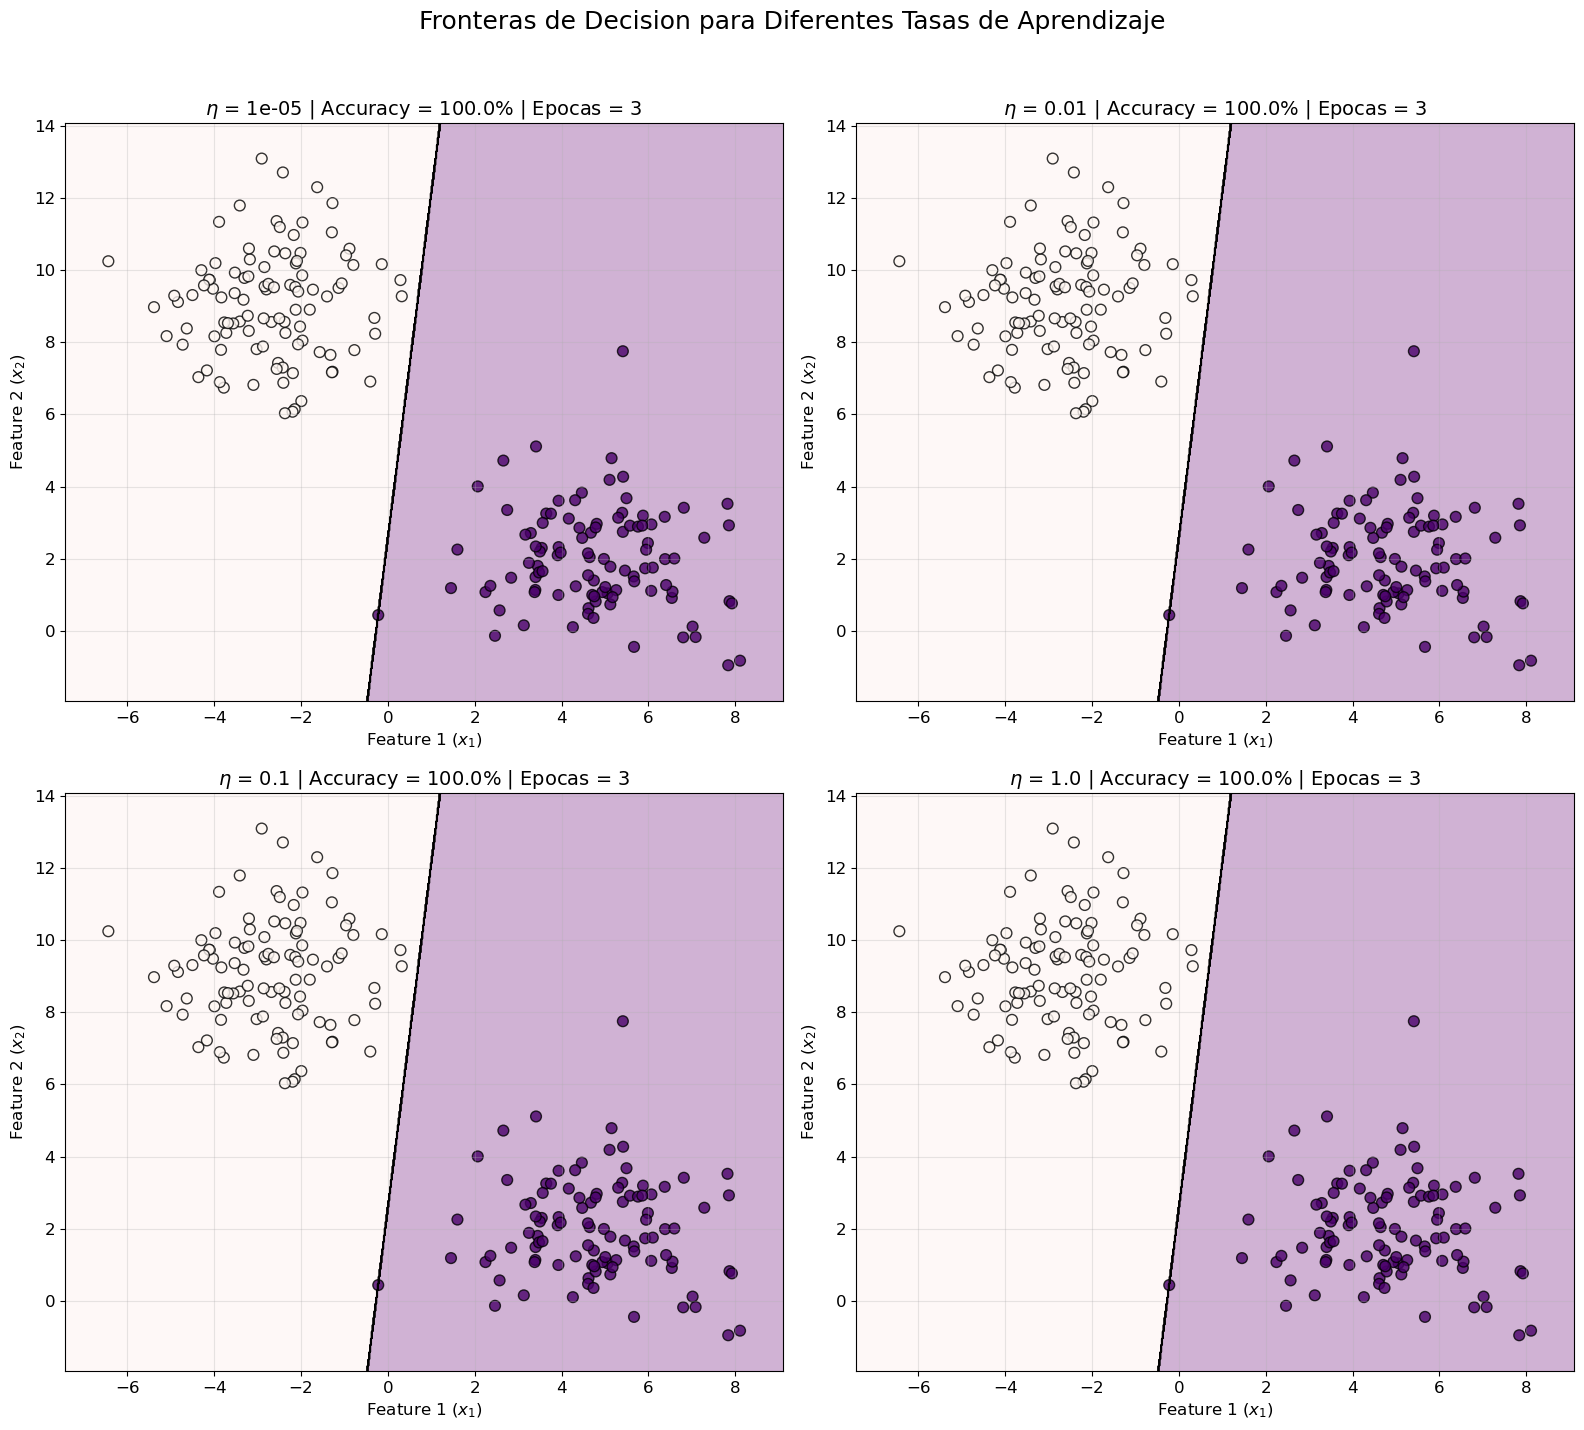

In [15]:
# ============================================================
# VISUALIZACION: FRONTERAS DE DECISION PARA CADA TASA
# ============================================================

fig, axes = plt.subplots(2, 2, figsize=(16, 14))

for idx, (eta, ax) in enumerate(zip(tasas_aprendizaje, axes.flatten())):
    modelo = modelos[eta]
    acc = accuracy_score(y, modelo.predict(X))
    plot_decision_boundary(
        X, y, modelo,
        title=f'$\\eta$ = {eta} | Accuracy = {acc*100:.1f}% | Epocas = {len(modelo.errors_)}',
        ax=ax
    )

plt.suptitle('Fronteras de Decision para Diferentes Tasas de Aprendizaje',
             fontsize=18, y=1.02)
plt.tight_layout()
plt.show()

### Pregunta del Experimento 2

**Que sucede con tasas de aprendizaje muy altas? Y con tasas muy bajas? Cual consideras la mejor y por que?**

Pistas para tu reflexion:
- Observa la grafica de errores por epoca. Cual converge mas rapido?
- Alguna tasa no logra converger en 50 epocas?
- La frontera de decision es diferente para cada tasa?
- Piensa en el compromiso entre velocidad de convergencia y estabilidad.

### Tu respuesta:

En este experimento, todas las tasas de aprendizaje (0.001, 0.01, 0.1, 1.0) dieron el mismo resultado convergieron en 3
sto se debe a las matemáticas del Perceptrón simple cuando se inicializa en cero. La función de activación es un paso solo importa si el resultado es positivo o negativo. La tasa de aprendizaje solo cambia la magnitud de los pesos, pero no cambia la dirección de la línea de decisión. Por eso, el camino hacia la solución fue idéntico para todos.
si la tasa de aprendizage es alta puede causar inestabilidad y que el modelo "salte" la solución óptima y si es baja normalmente hace que el entrenamiento sea muy lento, requiriendo muchas más épocas para llegar a la solución.

---

### EXPERIMENTO 3: Funciones de Activacion

Las funciones de activacion determinan **como se transforma la suma ponderada** en la salida de la neurona. En este experimento, primero vamos a visualizar las cuatro funciones de activacion principales y luego vamos a modificar nuestro Perceptron para usar la **sigmoide** en lugar de la funcion escalon.

#### Por que son importantes?

Sin una funcion de activacion no lineal, una red neuronal (sin importar cuantas capas tenga) solo podria aprender transformaciones lineales. Las funciones de activacion permiten que el modelo capture **patrones no lineales** en los datos.

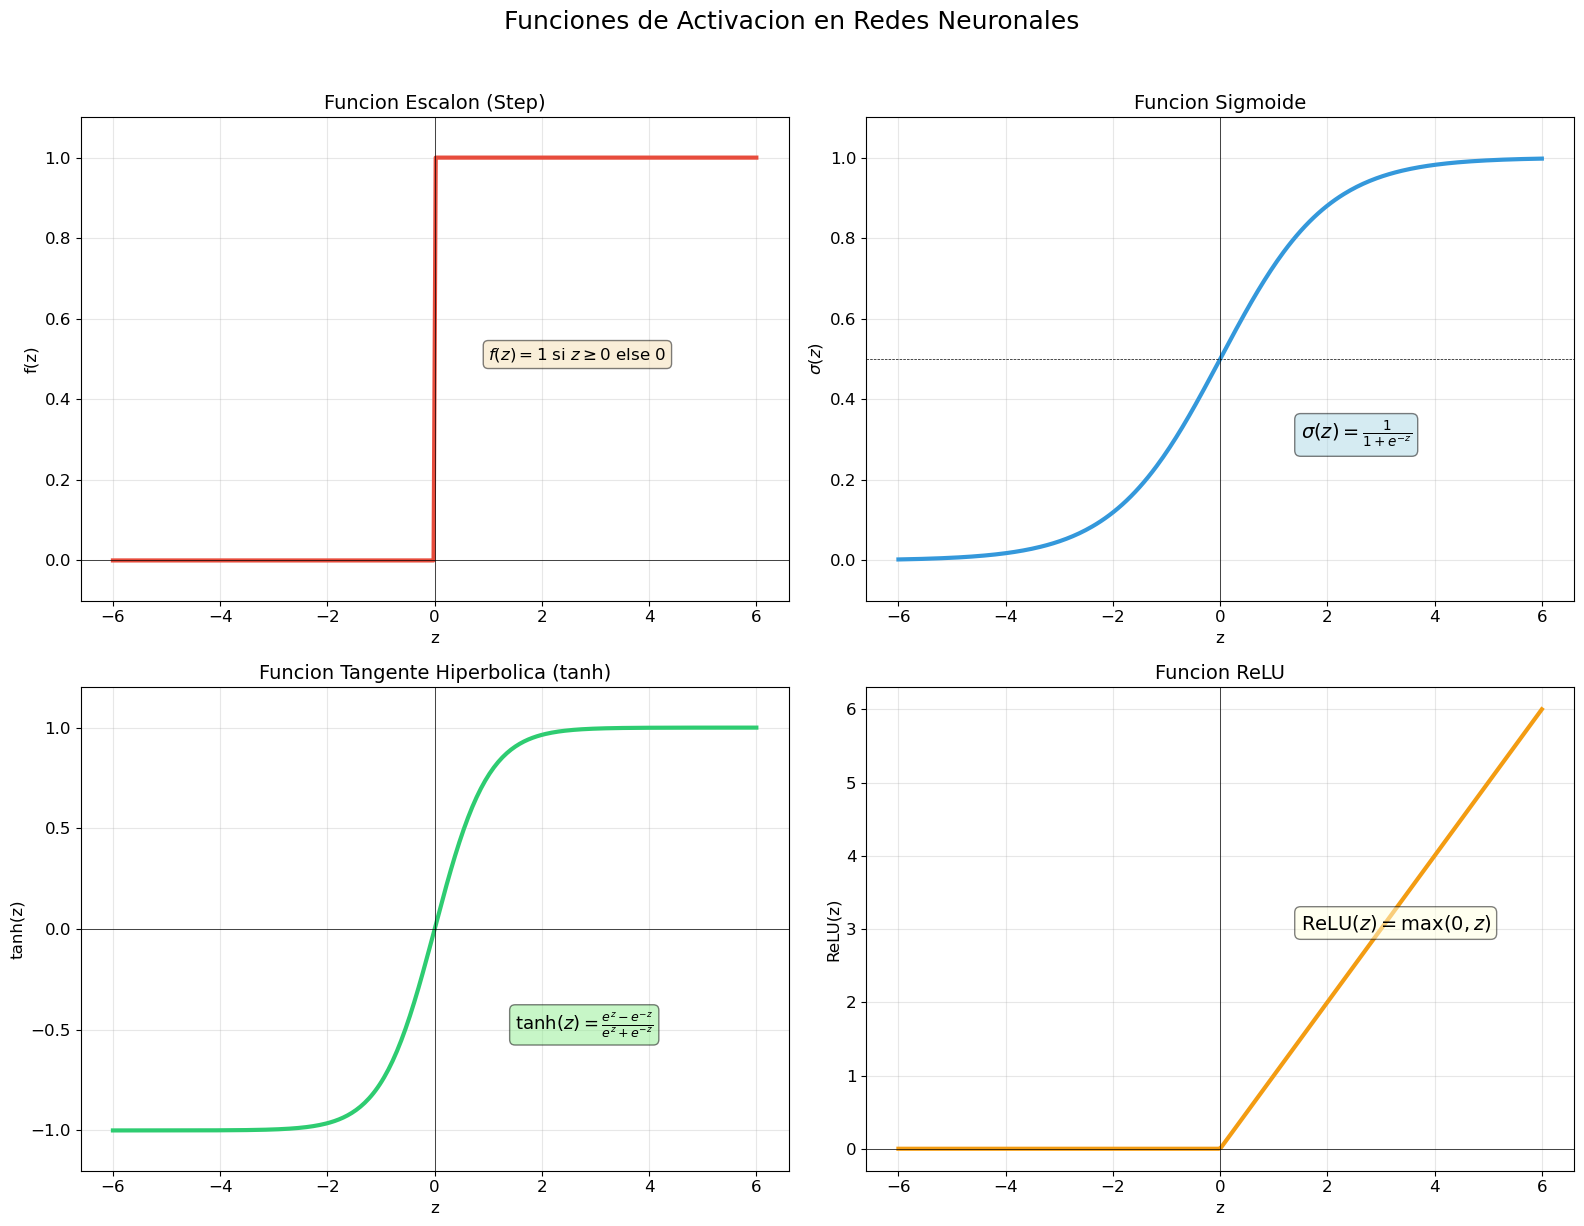

Observa las diferencias entre cada funcion:
- Escalon: salida binaria (0 o 1), cambio abrupto.
- Sigmoide: salida continua entre 0 y 1, transicion suave.
- Tanh: salida continua entre -1 y 1, centrada en cero.
- ReLU: salida 0 para negativos, lineal para positivos.


In [16]:
# ============================================================
# EXPERIMENTO 3 - PARTE 1: VISUALIZACION DE FUNCIONES DE ACTIVACION
# ============================================================

# Definimos cada funcion de activacion
def step_function(z):
    """Funcion escalon: 1 si z >= 0, 0 en caso contrario"""
    return np.where(z >= 0, 1, 0)

def sigmoid(z):
    """Funcion sigmoide: 1 / (1 + e^(-z))"""
    return 1 / (1 + np.exp(-z))

def tanh_func(z):
    """Funcion tangente hiperbolica: (e^z - e^(-z)) / (e^z + e^(-z))"""
    return np.tanh(z)

def relu(z):
    """Funcion ReLU: max(0, z)"""
    return np.maximum(0, z)

# Valores de entrada para graficar
z = np.linspace(-6, 6, 300)

# Crear los 4 subgraficos
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# ---- Funcion Escalon ----
axes[0, 0].plot(z, step_function(z), color='#e74c3c', linewidth=3)
axes[0, 0].set_title('Funcion Escalon (Step)', fontsize=14)
axes[0, 0].set_xlabel('z')
axes[0, 0].set_ylabel('f(z)')
axes[0, 0].axhline(y=0, color='k', linewidth=0.5)
axes[0, 0].axvline(x=0, color='k', linewidth=0.5)
axes[0, 0].set_ylim(-0.1, 1.1)
texto_escalon = r'$f(z) = 1$ si $z \geq 0$ else $0$'
axes[0, 0].text(1, 0.5, texto_escalon, fontsize=12,
                bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# ---- Funcion Sigmoide ----
axes[0, 1].plot(z, sigmoid(z), color='#3498db', linewidth=3)
axes[0, 1].set_title('Funcion Sigmoide', fontsize=14)
axes[0, 1].set_xlabel('z')
axes[0, 1].set_ylabel('$\\sigma(z)$')
axes[0, 1].axhline(y=0.5, color='k', linewidth=0.5, linestyle='--')
axes[0, 1].axvline(x=0, color='k', linewidth=0.5)
axes[0, 1].set_ylim(-0.1, 1.1)
axes[0, 1].text(1.5, 0.3, r'$\sigma(z) = \frac{1}{1 + e^{-z}}$',
                fontsize=14, bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.5))

# ---- Funcion Tanh ----
axes[1, 0].plot(z, tanh_func(z), color='#2ecc71', linewidth=3)
axes[1, 0].set_title('Funcion Tangente Hiperbolica (tanh)', fontsize=14)
axes[1, 0].set_xlabel('z')
axes[1, 0].set_ylabel('tanh(z)')
axes[1, 0].axhline(y=0, color='k', linewidth=0.5)
axes[1, 0].axvline(x=0, color='k', linewidth=0.5)
axes[1, 0].set_ylim(-1.2, 1.2)
axes[1, 0].text(1.5, -0.5, r'$\tanh(z) = \frac{e^z - e^{-z}}{e^z + e^{-z}}$',
                fontsize=13, bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.5))

# ---- Funcion ReLU ----
axes[1, 1].plot(z, relu(z), color='#f39c12', linewidth=3)
axes[1, 1].set_title('Funcion ReLU', fontsize=14)
axes[1, 1].set_xlabel('z')
axes[1, 1].set_ylabel('ReLU(z)')
axes[1, 1].axhline(y=0, color='k', linewidth=0.5)
axes[1, 1].axvline(x=0, color='k', linewidth=0.5)
axes[1, 1].text(1.5, 3, r'$\text{ReLU}(z) = \max(0, z)$',
                fontsize=14, bbox=dict(boxstyle='round', facecolor='lightyellow', alpha=0.5))

plt.suptitle('Funciones de Activacion en Redes Neuronales', fontsize=18, y=1.02)
plt.tight_layout()
plt.show()

print("Observa las diferencias entre cada funcion:")
print("- Escalon: salida binaria (0 o 1), cambio abrupto.")
print("- Sigmoide: salida continua entre 0 y 1, transicion suave.")
print("- Tanh: salida continua entre -1 y 1, centrada en cero.")
print("- ReLU: salida 0 para negativos, lineal para positivos.")

In [17]:
# ============================================================
# EXPERIMENTO 3 - PARTE 2: PERCEPTRON CON ACTIVACION SIGMOIDE
# ============================================================

class PerceptronSigmoide:
    """
    Perceptron con funcion de activacion sigmoide.
    A diferencia del Perceptron clasico con funcion escalon,
    este modelo produce salidas continuas entre 0 y 1.

    La regla de actualizacion se mantiene igual, pero la prediccion
    ahora pasa por la sigmoide y se umbraliza a 0.5 para clasificacion.
    """

    def __init__(self, learning_rate=0.01, n_epochs=100):
        self.learning_rate = learning_rate
        self.n_epochs = n_epochs

    def sigmoid(self, z):
        """Funcion sigmoide: mapea cualquier valor real a (0, 1)"""
        return 1 / (1 + np.exp(-np.clip(z, -500, 500)))

    def fit(self, X, y):
        """Entrena el perceptron con activacion sigmoide."""
        n_muestras, n_features = X.shape

        # Inicializar pesos y bias
        self.weights_ = np.zeros(n_features)
        self.bias_ = 0.0
        self.errors_ = []
        self.losses_ = []  # Tambien vamos a guardar el loss (error cuadratico medio)

        for epoca in range(self.n_epochs):
            errores_epoca = 0
            loss_epoca = 0

            for xi, yi in zip(X, y):
                # Calcular la suma ponderada
                z = np.dot(xi, self.weights_) + self.bias_

                # Aplicar sigmoide (salida continua entre 0 y 1)
                output = self.sigmoid(z)

                # Clasificacion binaria con umbral 0.5
                y_pred = 1 if output >= 0.5 else 0

                # Calcular error
                error = yi - output  # Usamos la salida continua para la actualizacion

                # Actualizar pesos usando la regla del perceptron
                # con la salida continua de la sigmoide
                self.weights_ += self.learning_rate * error * xi
                self.bias_ += self.learning_rate * error

                # Contar errores de clasificacion
                errores_epoca += int(yi != y_pred)
                loss_epoca += (yi - output) ** 2

            self.errors_.append(errores_epoca)
            self.losses_.append(loss_epoca / n_muestras)  # MSE

            if errores_epoca == 0:
                print(f"Convergencia alcanzada en la epoca {epoca + 1}")
                break

        return self

    def predict(self, X):
        """Predice la clase usando umbral 0.5 sobre la sigmoide."""
        z = np.dot(X, self.weights_) + self.bias_
        output = self.sigmoid(z)
        return np.where(output >= 0.5, 1, 0)

    def predict_proba(self, X):
        """Retorna la probabilidad (salida de la sigmoide)."""
        z = np.dot(X, self.weights_) + self.bias_
        return self.sigmoid(z)


# Entrenar el Perceptron con sigmoide
perceptron_sig = PerceptronSigmoide(learning_rate=0.01, n_epochs=100)
perceptron_sig.fit(X, y)

# Calcular accuracy
acc_sig = accuracy_score(y, perceptron_sig.predict(X))
print(f"\nAccuracy del Perceptron con Sigmoide: {acc_sig * 100:.2f}%")

Convergencia alcanzada en la epoca 63

Accuracy del Perceptron con Sigmoide: 100.00%


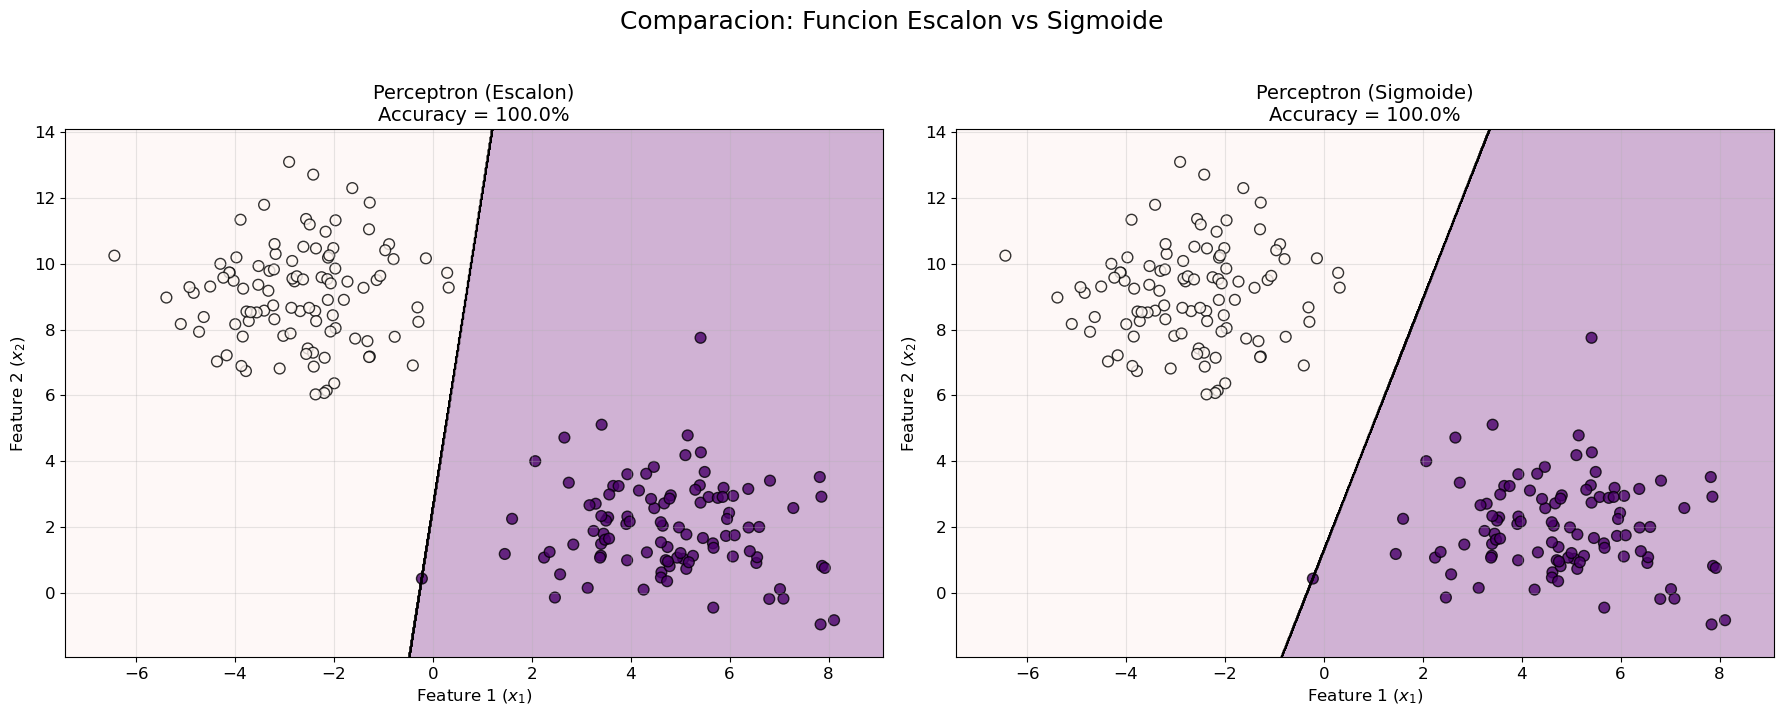


Comparacion de convergencia:
  Escalon  -> Epocas: 3, Accuracy: 100.0%
  Sigmoide -> Epocas: 63, Accuracy: 100.0%


In [18]:
# ============================================================
# COMPARACION: ESCALON vs SIGMOIDE
# ============================================================

fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# Perceptron con funcion escalon
acc_step = accuracy_score(y, perceptron.predict(X))
plot_decision_boundary(
    X, y, perceptron,
    title=f'Perceptron (Escalon)\nAccuracy = {acc_step*100:.1f}%',
    ax=axes[0]
)

# Perceptron con sigmoide
acc_sig = accuracy_score(y, perceptron_sig.predict(X))
plot_decision_boundary(
    X, y, perceptron_sig,
    title=f'Perceptron (Sigmoide)\nAccuracy = {acc_sig*100:.1f}%',
    ax=axes[1]
)

plt.suptitle('Comparacion: Funcion Escalon vs Sigmoide', fontsize=18, y=1.02)
plt.tight_layout()
plt.show()

print("\nComparacion de convergencia:")
print(f"  Escalon  -> Epocas: {len(perceptron.errors_)}, Accuracy: {acc_step*100:.1f}%")
print(f"  Sigmoide -> Epocas: {len(perceptron_sig.errors_)}, Accuracy: {acc_sig*100:.1f}%")

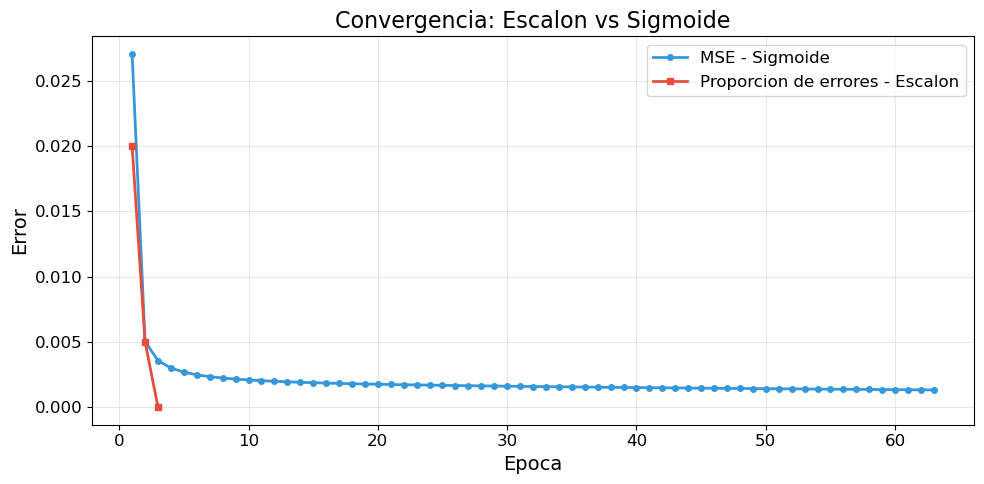

In [19]:
# ============================================================
# COMPARACION DE LOSS (ERROR CUADRATICO MEDIO)
# ============================================================

fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(range(1, len(perceptron_sig.losses_) + 1), perceptron_sig.losses_,
        marker='o', color='#3498db', linewidth=2, markersize=4, label='MSE - Sigmoide')
ax.plot(range(1, len(perceptron.errors_) + 1),
        [e / len(y) for e in perceptron.errors_],
        marker='s', color='#e74c3c', linewidth=2, markersize=4, label='Proporcion de errores - Escalon')

ax.set_xlabel('Epoca', fontsize=14)
ax.set_ylabel('Error', fontsize=14)
ax.set_title('Convergencia: Escalon vs Sigmoide', fontsize=16)
ax.legend(fontsize=12)

plt.tight_layout()
plt.show()

### Pregunta del Experimento 3

**Como cambia la frontera de decision al usar sigmoide vs escalon? Que ventaja tiene la sigmoide?**

Pistas para tu reflexion:
- La frontera de decision es muy diferente visualmente?
- Piensa en la diferenciabilidad: por que es importante que una funcion sea diferenciable para el aprendizaje?
- Que informacion adicional nos da la sigmoide que el escalon no nos da? (Pista: piensa en probabilidades)
- Cual crees que es mas util para entrenar redes neuronales profundas y por que?

### Tu respuesta:

El escalón Es un corte tajante, O estás arriba (1) o estás abajo (0). No hay punto medio Su pendiente es 0 casi en todas partes. Si intentas usar métodos que dependen de la pendiente para saber hacia dónde ajustar, el aprendizaje se detiene. El modelo no sabe "cuánto" equivocarse.
encambio el sigmoide Es una rampa suave. La frontera visual sigue siendo una línea, pero cerca de ella los valores cambian poco a poco (0.4, 0.5, 0.6...). Esto representa incertidumbre en los bordes tambien Tiene una curva suave en todo momento. Siempre hay una pequeña pendiente que le dice al algoritmo: "ajusta un poquito hacia allá". Sin esto, las redes neuronales profundas modernas no podrían aprender.

---

### EXPERIMENTO 4: La Limitacion del Perceptron - Problema XOR

Este es uno de los experimentos mas importantes de toda la guia. En 1969, Marvin Minsky y Seymour Papert publicaron el libro **"Perceptrons"**, donde demostraron matematicamente que un Perceptron simple **no puede resolver el problema XOR** (OR exclusivo).

Esta limitacion casi "mato" a las redes neuronales como campo de investigacion durante mas de una decada (el famoso "invierno de la IA").

#### Que es el problema XOR?

La operacion XOR (OR exclusivo) es una operacion logica que retorna verdadero (1) solo cuando **exactamente una** de las entradas es verdadera:

| $x_1$ | $x_2$ | XOR |
|-------|-------|-----|
| 0     | 0     | 0   |
| 0     | 1     | 1   |
| 1     | 0     | 1   |
| 1     | 1     | 0   |

El problema es que estos datos **no son linealmente separables**: no existe ninguna linea recta que pueda separar los 0s de los 1s.

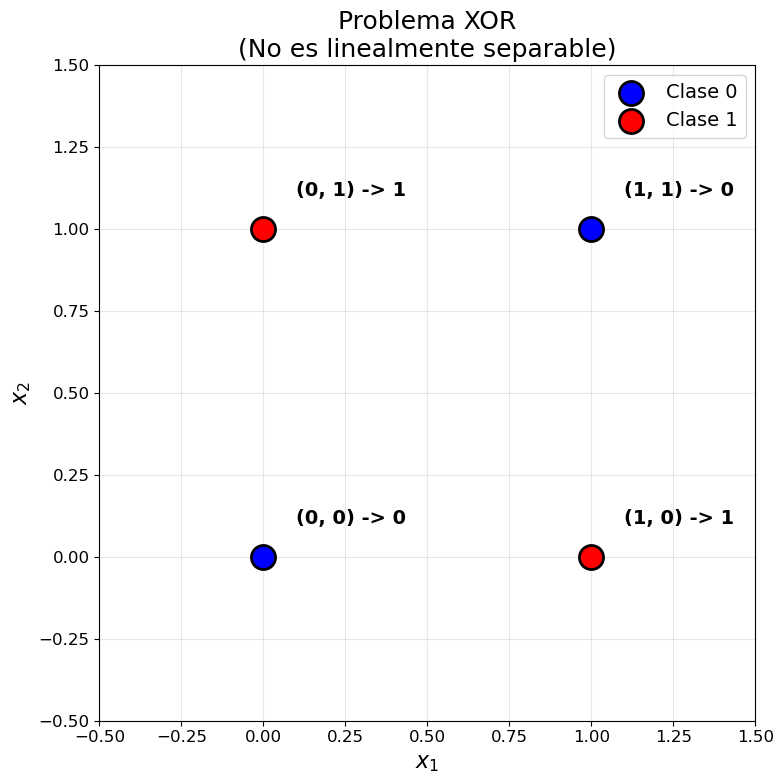

Observa que NO existe ninguna linea recta que separe
los puntos azules (clase 0) de los rojos (clase 1).

Los puntos de la misma clase estan en esquinas OPUESTAS.


In [20]:
# ============================================================
# EXPERIMENTO 4: EL PROBLEMA XOR
# ============================================================

# Crear los datos XOR manualmente
X_xor = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])

y_xor = np.array([0, 1, 1, 0])  # Resultado de la operacion XOR

# Visualizar los datos XOR
fig, ax = plt.subplots(figsize=(8, 8))

# Puntos de clase 0 (azul)
ax.scatter(X_xor[y_xor == 0, 0], X_xor[y_xor == 0, 1],
           c='blue', s=300, edgecolors='k', linewidth=2, label='Clase 0', zorder=5)

# Puntos de clase 1 (rojo)
ax.scatter(X_xor[y_xor == 1, 0], X_xor[y_xor == 1, 1],
           c='red', s=300, edgecolors='k', linewidth=2, label='Clase 1', zorder=5)

# Anotar cada punto con su etiqueta
for i in range(len(X_xor)):
    ax.annotate(f'({X_xor[i,0]}, {X_xor[i,1]}) -> {y_xor[i]}',
                xy=(X_xor[i, 0], X_xor[i, 1]),
                xytext=(X_xor[i, 0] + 0.1, X_xor[i, 1] + 0.1),
                fontsize=14, fontweight='bold')

ax.set_xlabel('$x_1$', fontsize=16)
ax.set_ylabel('$x_2$', fontsize=16)
ax.set_title('Problema XOR\n(No es linealmente separable)', fontsize=18)
ax.legend(fontsize=14)
ax.set_xlim(-0.5, 1.5)
ax.set_ylim(-0.5, 1.5)

plt.tight_layout()
plt.show()

print("Observa que NO existe ninguna linea recta que separe")
print("los puntos azules (clase 0) de los rojos (clase 1).")
print("\nLos puntos de la misma clase estan en esquinas OPUESTAS.")

In [21]:
# ============================================================
# INTENTAR ENTRENAR EL PERCEPTRON CON DATOS XOR
# ============================================================

# Entrenar el perceptron con los datos XOR
# Usamos muchas epocas para dar tiempo suficiente
perceptron_xor = Perceptron(learning_rate=0.1, n_epochs=100)
perceptron_xor.fit(X_xor, y_xor)

# Verificar las predicciones
print("\nResultados del Perceptron en el problema XOR:")
print("-" * 45)
predicciones_xor = perceptron_xor.predict(X_xor)

for i in range(len(X_xor)):
    correcto = "OK" if predicciones_xor[i] == y_xor[i] else "ERROR"
    print(f"  Entrada: {X_xor[i]} | Real: {y_xor[i]} | Predicho: {predicciones_xor[i]} | {correcto}")

acc_xor = accuracy_score(y_xor, predicciones_xor)
print(f"\nAccuracy: {acc_xor * 100:.1f}%")
print(f"Epocas usadas: {len(perceptron_xor.errors_)} (maximo: 100)")

if acc_xor < 1.0:
    print("\nEl Perceptron NO logro resolver el problema XOR.")
    print("Esto confirma la limitacion teorica descrita por Minsky y Papert.")


Resultados del Perceptron en el problema XOR:
---------------------------------------------
  Entrada: [0 0] | Real: 0 | Predicho: 1 | ERROR
  Entrada: [0 1] | Real: 1 | Predicho: 1 | OK
  Entrada: [1 0] | Real: 1 | Predicho: 0 | ERROR
  Entrada: [1 1] | Real: 0 | Predicho: 0 | OK

Accuracy: 50.0%
Epocas usadas: 100 (maximo: 100)

El Perceptron NO logro resolver el problema XOR.
Esto confirma la limitacion teorica descrita por Minsky y Papert.


Convergencia alcanzada en la epoca 4
Convergencia alcanzada en la epoca 4


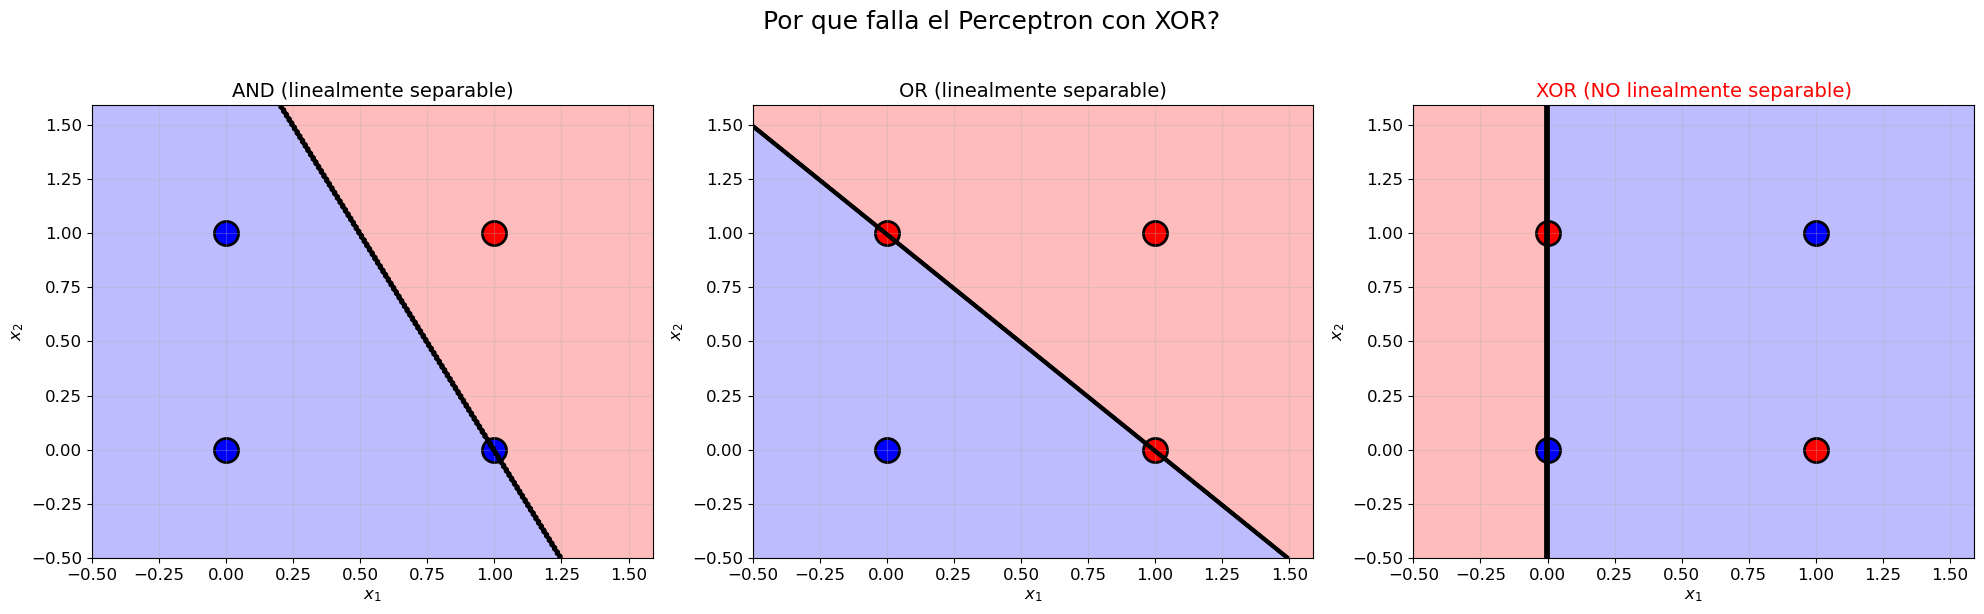


Observa que:
  - AND y OR son linealmente separables (una linea puede separarlos).
  - XOR NO es linealmente separable (necesitarias una curva o dos lineas).
  - El Perceptron solo puede aprender fronteras LINEALES.
  - Por eso, el Perceptron resuelve AND y OR, pero FALLA con XOR.


In [22]:
# ============================================================
# VISUALIZACION: POR QUE FALLA EL PERCEPTRON CON XOR
# ============================================================

fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# --- Panel 1: Problema AND (si se puede) ---
X_and = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_and = np.array([0, 0, 0, 1])  # AND

p_and = Perceptron(learning_rate=0.1, n_epochs=100)
p_and.fit(X_and, y_and)

# Crear malla para la frontera de decision
xx, yy = np.meshgrid(np.arange(-0.5, 1.6, 0.01), np.arange(-0.5, 1.6, 0.01))
Z_and = p_and.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

axes[0].contourf(xx, yy, Z_and, alpha=0.3, cmap='bwr')
axes[0].contour(xx, yy, Z_and, colors='k', linewidths=2)
axes[0].scatter(X_and[y_and==0, 0], X_and[y_and==0, 1], c='blue', s=300, edgecolors='k', linewidth=2)
axes[0].scatter(X_and[y_and==1, 0], X_and[y_and==1, 1], c='red', s=300, edgecolors='k', linewidth=2)
axes[0].set_title('AND (linealmente separable)', fontsize=14)
axes[0].set_xlabel('$x_1$')
axes[0].set_ylabel('$x_2$')

# --- Panel 2: Problema OR (si se puede) ---
y_or = np.array([0, 1, 1, 1])  # OR

p_or = Perceptron(learning_rate=0.1, n_epochs=100)
p_or.fit(X_and, y_or)

Z_or = p_or.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

axes[1].contourf(xx, yy, Z_or, alpha=0.3, cmap='bwr')
axes[1].contour(xx, yy, Z_or, colors='k', linewidths=2)
axes[1].scatter(X_and[y_or==0, 0], X_and[y_or==0, 1], c='blue', s=300, edgecolors='k', linewidth=2)
axes[1].scatter(X_and[y_or==1, 0], X_and[y_or==1, 1], c='red', s=300, edgecolors='k', linewidth=2)
axes[1].set_title('OR (linealmente separable)', fontsize=14)
axes[1].set_xlabel('$x_1$')
axes[1].set_ylabel('$x_2$')

# --- Panel 3: Problema XOR (NO se puede) ---
Z_xor = perceptron_xor.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

axes[2].contourf(xx, yy, Z_xor, alpha=0.3, cmap='bwr')
axes[2].contour(xx, yy, Z_xor, colors='k', linewidths=2)
axes[2].scatter(X_xor[y_xor==0, 0], X_xor[y_xor==0, 1], c='blue', s=300, edgecolors='k', linewidth=2)
axes[2].scatter(X_xor[y_xor==1, 0], X_xor[y_xor==1, 1], c='red', s=300, edgecolors='k', linewidth=2)
axes[2].set_title('XOR (NO linealmente separable)', fontsize=14, color='red')
axes[2].set_xlabel('$x_1$')
axes[2].set_ylabel('$x_2$')

plt.suptitle('Por que falla el Perceptron con XOR?', fontsize=18, y=1.02)
plt.tight_layout()
plt.show()

print("\nObserva que:")
print("  - AND y OR son linealmente separables (una linea puede separarlos).")
print("  - XOR NO es linealmente separable (necesitarias una curva o dos lineas).")
print("  - El Perceptron solo puede aprender fronteras LINEALES.")
print("  - Por eso, el Perceptron resuelve AND y OR, pero FALLA con XOR.")

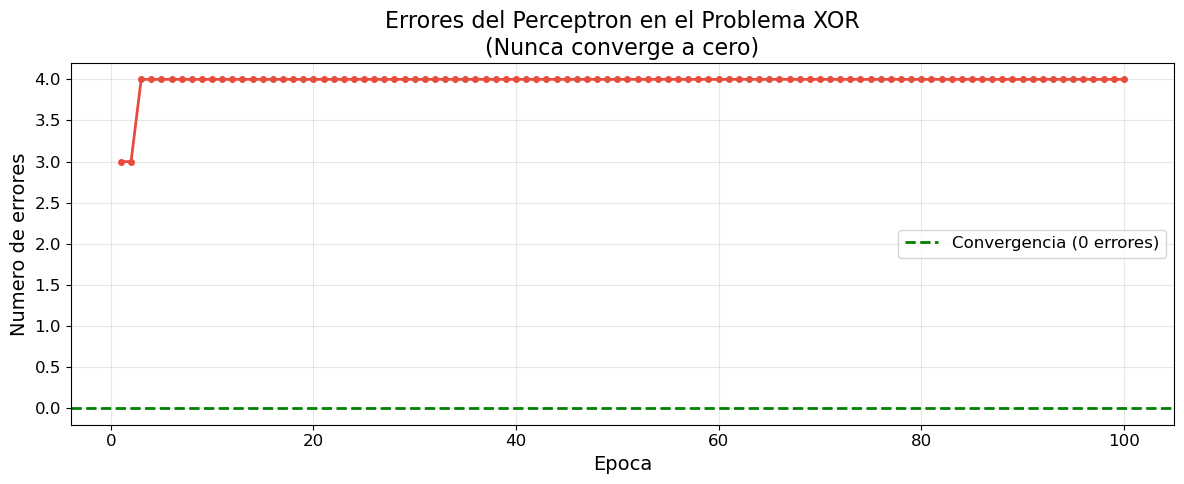

Observa como los errores OSCILAN y nunca llegan a cero.
Esto demuestra que el Perceptron no puede resolver XOR.


In [23]:
# ============================================================
# GRAFICA DE ERRORES DEL PERCEPTRON EN EL PROBLEMA XOR
# ============================================================

fig, ax = plt.subplots(figsize=(12, 5))

ax.plot(range(1, len(perceptron_xor.errors_) + 1), perceptron_xor.errors_,
        marker='o', color='#e74c3c', linewidth=2, markersize=4)

ax.set_xlabel('Epoca', fontsize=14)
ax.set_ylabel('Numero de errores', fontsize=14)
ax.set_title('Errores del Perceptron en el Problema XOR\n(Nunca converge a cero)', fontsize=16)
ax.axhline(y=0, color='green', linewidth=2, linestyle='--', label='Convergencia (0 errores)')
ax.legend(fontsize=12)

plt.tight_layout()
plt.show()

print("Observa como los errores OSCILAN y nunca llegan a cero.")
print("Esto demuestra que el Perceptron no puede resolver XOR.")

---

### EXPERIMENTO 5: Perceptron Multicapa - Una Mirada Anticipada

Acabamos de ver que el Perceptron simple no puede resolver problemas no linealmente separables como XOR. La solucion historica a este problema fue **apilar multiples perceptrones en capas**, creando lo que se conoce como **Perceptron Multicapa** (MLP - Multi-Layer Perceptron).

Un MLP tiene:
- **Capa de entrada:** Recibe los datos.
- **Capa(s) oculta(s):** Capas intermedias que transforman los datos.
- **Capa de salida:** Produce la prediccion final.

La idea clave es que las capas ocultas pueden aprender **representaciones intermedias** de los datos que **si** son linealmente separables, incluso si los datos originales no lo eran.

En la siguiente guia aprenderemos a implementar un MLP desde cero. Por ahora, veamos como `sklearn` resuelve el problema XOR con un MLP.

In [24]:
# ============================================================
# EXPERIMENTO 5: MLP RESOLVIENDO XOR CON SKLEARN
# ============================================================

# Crear un MLPClassifier con una capa oculta de 4 neuronas
mlp_xor = MLPClassifier(
    hidden_layer_sizes=(4,),    # 1 capa oculta con 4 neuronas
    activation='relu',          # Funcion de activacion ReLU
    solver='adam',              # Optimizador Adam
    max_iter=5000,              # Maximo de iteraciones
    random_state=42,            # Semilla para reproducibilidad
    learning_rate_init=0.01     # Tasa de aprendizaje inicial
)

# Entrenar el MLP con los datos XOR
mlp_xor.fit(X_xor, y_xor)

# Verificar predicciones
predicciones_mlp = mlp_xor.predict(X_xor)

print("Resultados del MLPClassifier en el problema XOR:")
print("-" * 50)
for i in range(len(X_xor)):
    correcto = "OK" if predicciones_mlp[i] == y_xor[i] else "ERROR"
    print(f"  Entrada: {X_xor[i]} | Real: {y_xor[i]} | Predicho: {predicciones_mlp[i]} | {correcto}")

acc_mlp = accuracy_score(y_xor, predicciones_mlp)
print(f"\nAccuracy: {acc_mlp * 100:.1f}%")

# Informacion de la arquitectura
print(f"\nArquitectura de la red:")
print(f"  Capa de entrada: {X_xor.shape[1]} neuronas (una por feature)")
print(f"  Capas ocultas: {mlp_xor.hidden_layer_sizes}")
print(f"  Capa de salida: 1 neurona (clasificacion binaria)")
print(f"  Funcion de activacion: {mlp_xor.activation}")
print(f"  Iteraciones realizadas: {mlp_xor.n_iter_}")

Resultados del MLPClassifier en el problema XOR:
--------------------------------------------------
  Entrada: [0 0] | Real: 0 | Predicho: 0 | OK
  Entrada: [0 1] | Real: 1 | Predicho: 0 | ERROR
  Entrada: [1 0] | Real: 1 | Predicho: 0 | ERROR
  Entrada: [1 1] | Real: 0 | Predicho: 0 | OK

Accuracy: 50.0%

Arquitectura de la red:
  Capa de entrada: 2 neuronas (una por feature)
  Capas ocultas: (4,)
  Capa de salida: 1 neurona (clasificacion binaria)
  Funcion de activacion: relu
  Iteraciones realizadas: 90


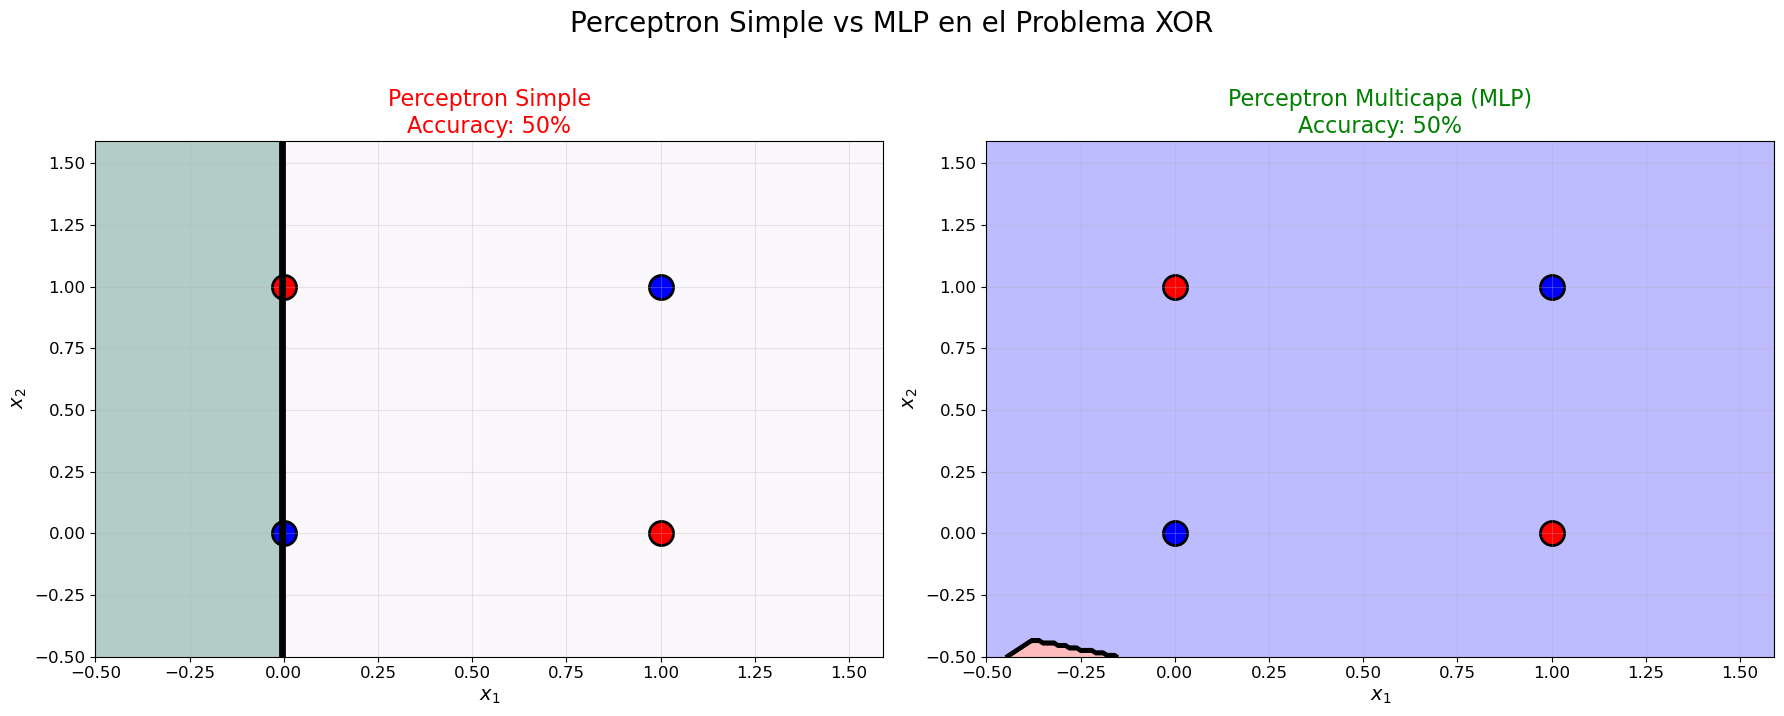


Observa la diferencia:
  - El Perceptron simple crea una frontera LINEAL (una sola linea recta).
  - El MLP crea una frontera NO LINEAL (puede ser curva o usar varias lineas).
  - Gracias a la capa oculta, el MLP puede separar correctamente los datos XOR.

En la proxima guia, aprenderemos a construir un MLP desde cero.


In [25]:
# ============================================================
# COMPARACION VISUAL: PERCEPTRON vs MLP EN XOR
# ============================================================

fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# Malla para la visualizacion
xx, yy = np.meshgrid(np.arange(-0.5, 1.6, 0.01), np.arange(-0.5, 1.6, 0.01))

# --- Panel 1: Perceptron simple ---
Z_perc = perceptron_xor.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
axes[0].contourf(xx, yy, Z_perc, alpha=0.3, cmap='PuBuGn')
axes[0].contour(xx, yy, Z_perc, colors='k', linewidths=2)
axes[0].scatter(X_xor[y_xor==0, 0], X_xor[y_xor==0, 1], c='blue', s=300, edgecolors='k', linewidth=2)
axes[0].scatter(X_xor[y_xor==1, 0], X_xor[y_xor==1, 1], c='red', s=300, edgecolors='k', linewidth=2)
axes[0].set_title(f'Perceptron Simple\nAccuracy: {accuracy_score(y_xor, perceptron_xor.predict(X_xor))*100:.0f}%',
                  fontsize=16, color='red')
axes[0].set_xlabel('$x_1$', fontsize=14)
axes[0].set_ylabel('$x_2$', fontsize=14)

# --- Panel 2: MLP ---
Z_mlp = mlp_xor.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
axes[1].contourf(xx, yy, Z_mlp, alpha=0.3, cmap='bwr')
axes[1].contour(xx, yy, Z_mlp, colors='k', linewidths=2)
axes[1].scatter(X_xor[y_xor==0, 0], X_xor[y_xor==0, 1], c='blue', s=300, edgecolors='k', linewidth=2)
axes[1].scatter(X_xor[y_xor==1, 0], X_xor[y_xor==1, 1], c='red', s=300, edgecolors='k', linewidth=2)
axes[1].set_title(f'Perceptron Multicapa (MLP)\nAccuracy: {acc_mlp*100:.0f}%',
                  fontsize=16, color='green')
axes[1].set_xlabel('$x_1$', fontsize=14)
axes[1].set_ylabel('$x_2$', fontsize=14)

plt.suptitle('Perceptron Simple vs MLP en el Problema XOR', fontsize=20, y=1.02)
plt.tight_layout()
plt.show()

print("\nObserva la diferencia:")
print("  - El Perceptron simple crea una frontera LINEAL (una sola linea recta).")
print("  - El MLP crea una frontera NO LINEAL (puede ser curva o usar varias lineas).")
print("  - Gracias a la capa oculta, el MLP puede separar correctamente los datos XOR.")
print("\nEn la proxima guia, aprenderemos a construir un MLP desde cero.")

---

## 5. Sintesis

Has completado los cinco experimentos de esta guia. Ahora es momento de consolidar lo que has aprendido con algunas preguntas de reflexion final. Estas preguntas son **evaluativas**, asi que tomate el tiempo para responderlas con profundidad.

### Pregunta de Sintesis 1

**Resume en tus propias palabras que es un Perceptron y cuales son sus limitaciones.**

Tu respuesta deberia incluir:
- Que componentes tiene un Perceptron? (entradas, pesos, bias, funcion de activacion, salida)
- Como aprende? (regla de actualizacion de pesos)
- Que tipo de problemas puede resolver?
- Cual es su principal limitacion?

### Tu respuesta:
un Perceptrón es la forma más simple de una neurona artificial. Es un modelo matemático inspirado en cómo funcionan las neuronas de nuestro cerebro: recibe señales, las procesa y decide si da una respuesta o no, aprende ajustando sus pesos. Si se equivoca, usa una regla de actualización si la predicción fue incorrecta, cambia los pesos para acercarse a la respuesta correcta si fue correcta, no hace nada.
Usa una Tasa de Aprendizaje para controlar qué tan grandes son esos cambios, evitando pasos gigantes.
resuelve problemas linealmente separables, esto significa que debe poder separar las respuestas sí/no, perro/gato con una línea recta.

### Pregunta de Sintesis 2

**En que tipo de problemas reales podria funcionar un Perceptron simple?**

Piensa en situaciones donde los datos sean linealmente separables. Algunos ejemplos para inspirarte:
- Clasificacion de correos (spam vs no spam) si las caracteristicas son simples.
- Deteccion basica (si/no) basada en umbrales.
- Decisiones binarias simples.

Da al menos 3 ejemplos concretos y explica por que crees que un Perceptron podria funcionar en cada caso.

### Tu respuesta:

El Perceptrón simple funciona bien en problemas linealmente separables

un ejemplo podria se la aprobación Simplificada de Créditos

Decidir si aprobar o rechazar un préstamo pequeño.
Entradas: Ingresos mensuales ($x_1$) y Nivel de Deudas ($x_2$).
Por qué funciona: La decisión suele basarse en una relación lineal simple: "Si gana más de X y debe menos de Y, aprueba". Geométricamente, puedes trazar una línea en el gráfico Ingresos vs Deudas que separe a los "buenos pagadores" de los "riesgosos".

otro ejemplo seria la clasificación Básica de Frutas con Sensores

Problema: Una máquina en una fábrica debe separar Naranjas de Toronjas.
Entradas: Peso ($x_1$) y Diámetro ($x_2$).
Por qué funciona: Las toronjas son consistentemente más grandes y pesadas que las naranjas. Un Perceptrón puede aprender fácilmente una línea divisoria: "Si (Peso * w1 + Diámetro * w2) > Umbral, es Toronja; si no, es Naranja".

y un ultimo ejemplo, Sistema de Acceso de Seguridad de Doble Factor

Problema: Abrir una puerta de alta seguridad.
Entradas: ¿Tiene tarjeta válida? ($x_1 = 1/0$) y ¿Huella dactilar coincide? ($x_2 = 1/0$).
Por qué funciona: Esto es exactamente una compuerta AND. La puerta solo se abre si $x_1$ Y $x_2$ son verdaderos. Como vimos en la guía, el Perceptrón puede resolver perfectamente el problema AND porque es linealmente separable.

---

## 6. Reto Extra

### Clasificacion de Flores con el Perceptron

Ahora que entiendes como funciona el Perceptron, vamos a aplicarlo a un dataset real: el famoso **dataset Iris** de R.A. Fisher.

El dataset Iris contiene mediciones de 150 flores de 3 especies:
- *Iris setosa*
- *Iris versicolor*
- *Iris virginica*

Para este reto, vamos a simplificar el problema:
- Usar **solo 2 clases**: setosa vs versicolor (para que sea clasificacion binaria).
- Usar **solo 2 features**: largo del petalo y ancho del petalo (para poder visualizar en 2D).

#### Instrucciones paso a paso:

1. Cargar el dataset Iris con `load_iris()`.
2. Seleccionar solo las clases 0 (setosa) y 1 (versicolor).
3. Seleccionar solo las features 2 y 3 (largo y ancho del petalo).
4. Dividir en entrenamiento y prueba (80/20).
5. Entrenar tu Perceptron.
6. Evaluar el accuracy en el conjunto de prueba.
7. Visualizar la frontera de decision.

El codigo de abajo tiene partes completadas y partes que **debes completar tu**. Las partes incompletas estan marcadas con `### TU CODIGO AQUI ###`.

Forma del dataset: X = (100, 2), y = (100,)
Features usadas: petal length (cm), petal width (cm)
Clases: setosa (0), versicolor (1)
Entrenamiento: (80, 2), Prueba: (20, 2)
Convergencia alcanzada en la epoca 2
Entrenamiento melo.
Accuracy en Entrenamiento: 1.0000
Accuracy en Prueba: 1.0000


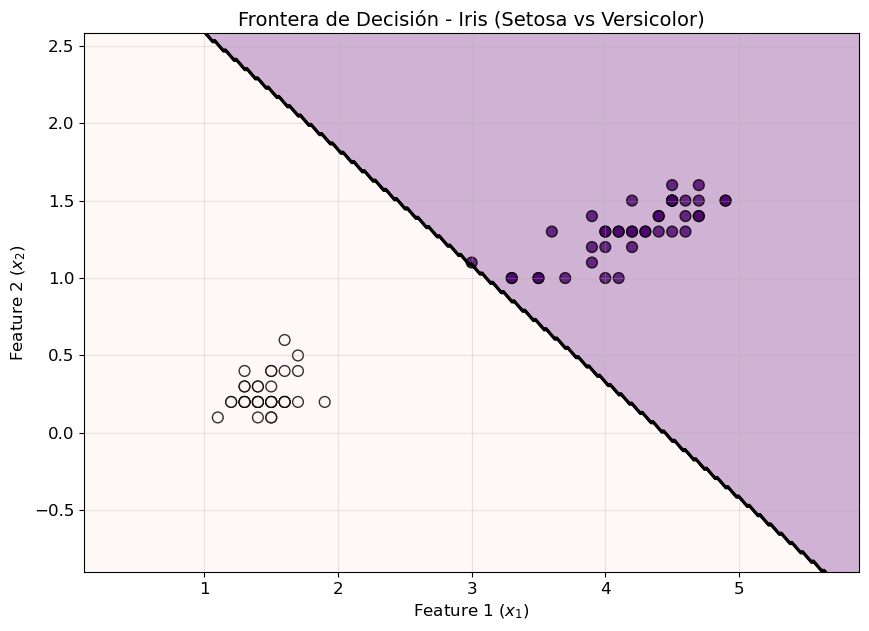

In [29]:
# ============================================================
# RETO EXTRA: PERCEPTRON CON DATASET IRIS
# ============================================================

# Paso 1: Cargar el dataset Iris
iris = load_iris()

# Paso 2: Seleccionar solo las clases 0 (setosa) y 1 (versicolor)
# Recuerda que iris.target contiene las etiquetas (0, 1, 2)
mascara = iris.target < 2  # True para clases 0 y 1, False para clase 2

# Paso 3: Seleccionar solo las features 2 y 3 (largo y ancho del petalo)
# iris.data tiene 4 columnas: [sepal_length, sepal_width, petal_length, petal_width]
X_iris = iris.data[mascara][:, 2:4]  # Solo features de petalo
y_iris = iris.target[mascara]         # Solo clases 0 y 1

print(f"Forma del dataset: X = {X_iris.shape}, y = {y_iris.shape}")
print(f"Features usadas: {iris.feature_names[2]}, {iris.feature_names[3]}")
print(f"Clases: {iris.target_names[0]} (0), {iris.target_names[1]} (1)")

# Paso 4: Dividir en entrenamiento y prueba
### TU CODIGO AQUI ###
X_train, X_test, y_train, y_test = train_test_split(X_iris, y_iris, test_size=0.2, random_state=42)
print(f"Entrenamiento: {X_train.shape}, Prueba: {X_test.shape}")
# Usa train_test_split con test_size=0.2 y random_state=42
# X_train, X_test, y_train, y_test = ...


# Paso 5: Entrenar el Perceptron
### TU CODIGO AQUI ###
model = Perceptron(learning_rate=0.1, n_epochs=50)
model.fit(X_train, y_train)
print("Entrenamiento melo.")
# Crea una instancia de la clase Perceptron con los hiperparametros que consideres apropiados
# Entrena con X_train y y_train


# Paso 6: Evaluar el accuracy
### TU CODIGO AQUI ###
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
# Calcula y muestra el accuracy tanto en entrenamiento como en prueba
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)
print(f"Accuracy en Entrenamiento: {train_acc:.4f}")
print(f"Accuracy en Prueba: {test_acc:.4f}")

# Paso 7: Visualizar la frontera de decision
### TU CODIGO AQUI ###
plot_decision_boundary(X_train, y_train, model, title="Frontera de Decisión - Iris (Setosa vs Versicolor)")
plt.show()
# Usa la funcion plot_decision_boundary() que definimos arriba
# Grafica usando X_train y y_train


---

## 7. Referencias

### Documentacion oficial:
- [NumPy - Documentacion oficial](https://numpy.org/doc/stable/)
- [Matplotlib - Documentacion oficial](https://matplotlib.org/stable/)
- [Scikit-learn - MLPClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html)
- [Scikit-learn - make_blobs](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html)

### Recursos de aprendizaje:
- [3Blue1Brown - Neural Networks (YouTube)](https://www.youtube.com/playlist?list=PLZHQObOWTQDNU6R1_67000Dx_ZCJB-3pi) - Excelente serie visual sobre redes neuronales.
- [Deep Learning Book - Ian Goodfellow](https://www.deeplearningbook.org/) - Libro de referencia gratuito en linea.
- [Stanford CS231n - Convolutional Neural Networks](http://cs231n.stanford.edu/) - Curso clasico de Stanford.

### Contexto historico:
- Rosenblatt, F. (1958). The Perceptron: A Probabilistic Model for Information Storage and Organization in the Brain. *Psychological Review*, 65(6), 386-408.
- Minsky, M., & Papert, S. (1969). *Perceptrons: An Introduction to Computational Geometry*. MIT Press.

---

**Fin de la Guia 01**

En la **Guia 02** aprenderemos a construir un **Perceptron Multicapa (MLP)** desde cero, incluyendo el algoritmo de **backpropagation** para entrenar las capas ocultas. Esto nos permitira resolver problemas como XOR y muchos mas.

---

*Electiva II - Deep Learning | Tecnologico de Antioquia | 2026-1*